# Benchmark Langdetection

**Group:** 2

**Members:** Yoann Loial - Victor Mader - Tristan Chaput

**Output metrics:** Accuracy & Execution Time

*Benchmarking on lang classifier.*

Dataset source for benchmarking : [The UMass Global English on Twitter Dataset | Kaggle](https://www.kaggle.com/datasets/rtatman/the-umass-global-english-on-twitter-dataset)

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('./input/all_annotated.tsv', sep='\t', nrows=500)

ytrue = df['Definitely English'].to_list()
tweets = df['Tweet'].to_list()

## langid

In [2]:
import langid
from langid.langid import LanguageIdentifier, model
lang_identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

### Execution time

In [3]:
%%timeit -n 10
langid_preds = [lang_identifier.classify(t)[0] for t in tweets]

934 ms ± 7.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Accuracy

In [4]:
langid_preds = [lang_identifier.classify(t)[0] for t in tweets]
langid_preds_binary = [1 if p == 'en' else 0 for p in langid_preds]
accuracy_score(ytrue, langid_preds_binary)

0.85

## FastText

In [5]:
import fasttext

path_to_pretrained_model = './input/lid.176.bin'
fmodel = fasttext.load_model(path_to_pretrained_model)

### Execution time

In [6]:
%%timeit -n 10
fasttext_preds = fmodel.predict(tweets)

7.4 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Accuracy

In [7]:
fasttext_preds = fmodel.predict(tweets)
fasttext_preds_binary = [1 if p == '__label__en' else 0 for p in fasttext_preds[0]]
accuracy_score(ytrue, fasttext_preds_binary)

0.504

## SpaCy

In [10]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

### Execution time

In [11]:
%%timeit -n 10
spacy_preds = [nlp(t)._.language for t in tweets]

7 s ± 97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Accuracy score

In [12]:
spacy_preds = [nlp(t)._.language for t in tweets]
spacy_preds_binary = [1 if p == 'en' else 0 for p in spacy_preds]
accuracy_score(ytrue, spacy_preds_binary)

0.504

## Conclusion

<AxesSubplot:>

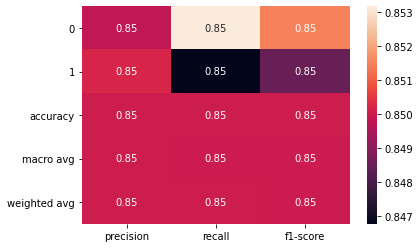

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report

langid_report = classification_report(ytrue, langid_preds_binary, output_dict=True)
sns.heatmap(pd.DataFrame(langid_report).iloc[:-1, :].T, annot=True)

c:\Users\Tristan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

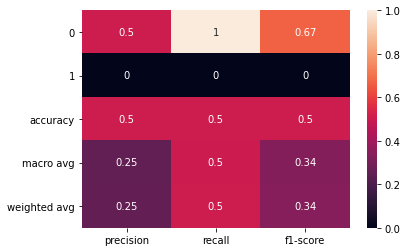

In [14]:
spacy_report = classification_report(ytrue, spacy_preds_binary, output_dict=True)
sns.heatmap(pd.DataFrame(spacy_report).iloc[:-1, :].T, annot=True)

<AxesSubplot:>

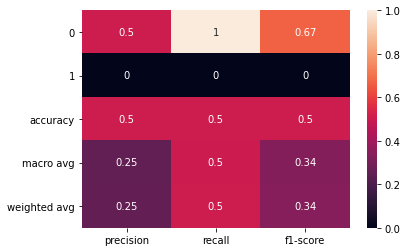

In [15]:
fasttext_report = classification_report(ytrue, fasttext_preds_binary, output_dict=True)
sns.heatmap(pd.DataFrame(fasttext_report).iloc[:-1, :].T, annot=True)